# **Machine Learning Project - Basic Part:** Chronic Heart Disease (CHD) prediction.
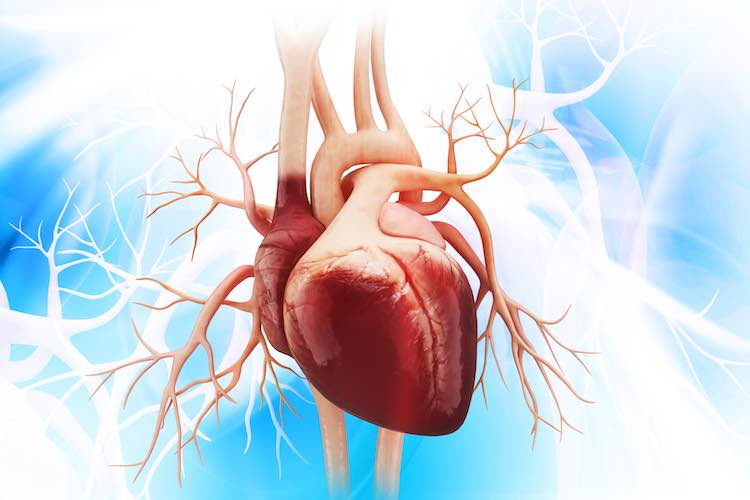

### 1. Import file and generate the dataframe

In [6]:
from matplotlib import pyplot
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [8]:
import pandas as pd
filename='heart.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Dataset description

In [95]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [96]:
set_option('display.width', 200)
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('precision', 3) 

#### Split numerical and categorical values



*   numerical values: age, resting blood pressure (trestbps), serum cholestoral (chol), maximum heart rate achieved (thalach), ST depression induced by exercise relative to rest (oldpeak);
*   categorical values: sex, chest pain type (cp), fasting blood sugar (fbs), resting electrocardiographic results (restecg), exercise induced angina (exang), slope of the peak exercise ST segment (slope), the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy (cp), thalassemia (thal). 


In [97]:
names=['age','sex','cp','trestbps', 'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']
class_names=['sex','cp','fbs','restecg','exang','slope','ca','thal']
real_names=[]
for i in range(len(names)):
  if names[i] not in class_names:
    real_names.append(names[i])
real_names.remove('target')
real_names

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### Dataset description

In [98]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [99]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

CHD is diagnosed to a total of 165 individuals while 138 individuals are safe.

#### Check for missing values

In [100]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in the dataset.

#### Bivariate analysis

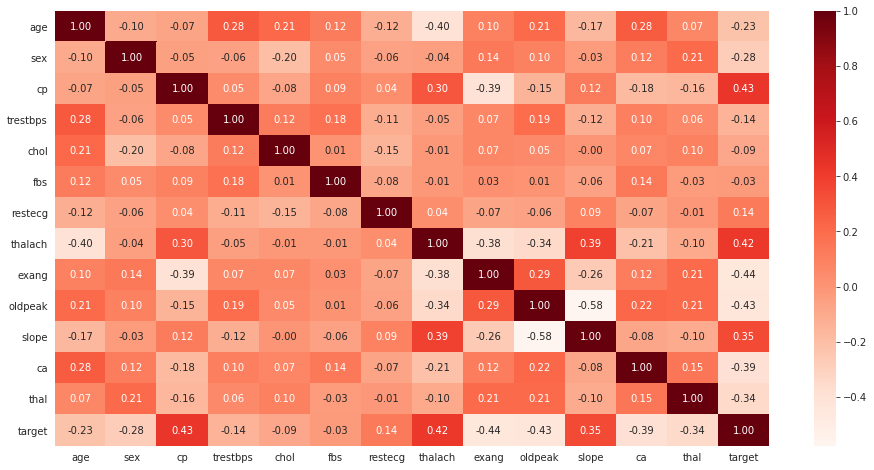

In [101]:
corr =df.corr()
fig, ax =pyplot.subplots(figsize =(16,8))
ax  = sns.heatmap(corr,annot =True,fmt = ".2f", cmap = 'Reds');

In [102]:
corr['target'].sort_values(ascending=False)

target      1.000
cp          0.434
thalach     0.422
slope       0.346
restecg     0.137
fbs        -0.028
chol       -0.085
trestbps   -0.145
age        -0.225
sex        -0.281
thal       -0.344
ca         -0.392
oldpeak    -0.431
exang      -0.437
Name: target, dtype: float64

Although there are no attributes with strong positive or negative correlation with the target, chest pain type (cp) and maximum heart rate achieved (thalach) show middle positive correlation (0.434 and 0.422 respectively) while peak exercise ST segment (oldpeak) and exercise induced angina (exang) show middle negative correlation (-0.431 and -0,437 respectively).

#### Univariate analysis of numerical and categorical attributes

* Age



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


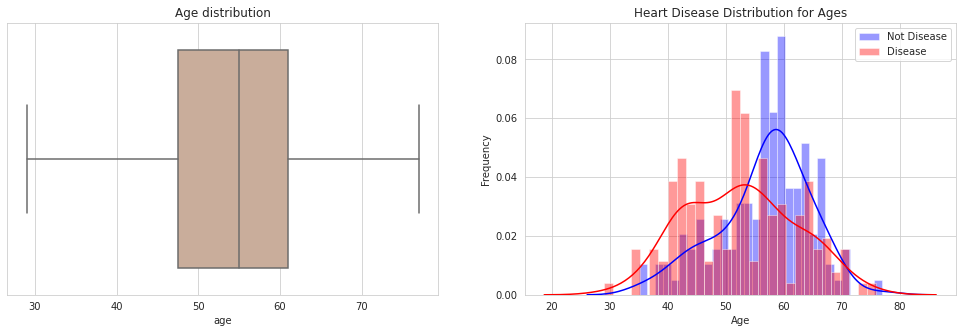

In [103]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df['age'], palette = "pink", ax=ax[0])
ax[0].set_title("Age distribution")
sns.distplot(df.age[df['target'] == 0], bins=30, color='blue', label='Not Disease',ax=ax[1])
sns.distplot(df.age[df['target'] == 1], bins=30, color='red', label='Disease',ax=ax[1])
plt.legend()
plt.title('Heart Disease Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Resting Blood Pressure

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


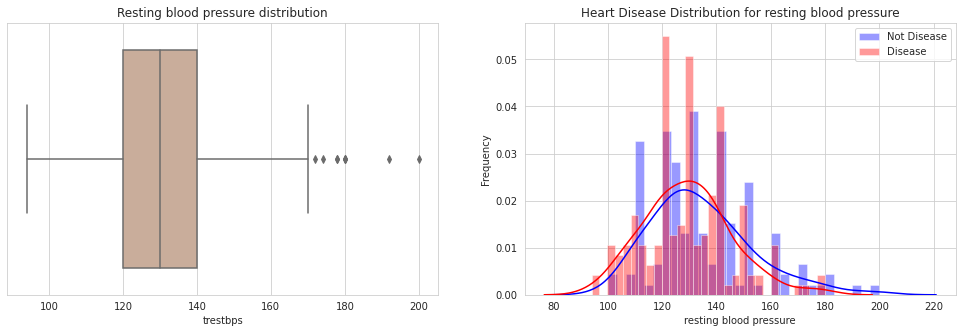

In [104]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df['trestbps'], palette = "pink", ax=ax[0])
ax[0].set_title("Resting blood pressure distribution")
sns.distplot(df.trestbps[df['target'] == 0], bins=30, color='blue', label='Not Disease', ax=ax[1])
sns.distplot(df.trestbps[df['target'] == 1], bins=30, color='red', label='Disease',ax=ax[1])
plt.legend()
plt.title('Heart Disease Distribution for resting blood pressure')
plt.xlabel('resting blood pressure')
plt.ylabel('Frequency')
plt.show()

* Cholesterol



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


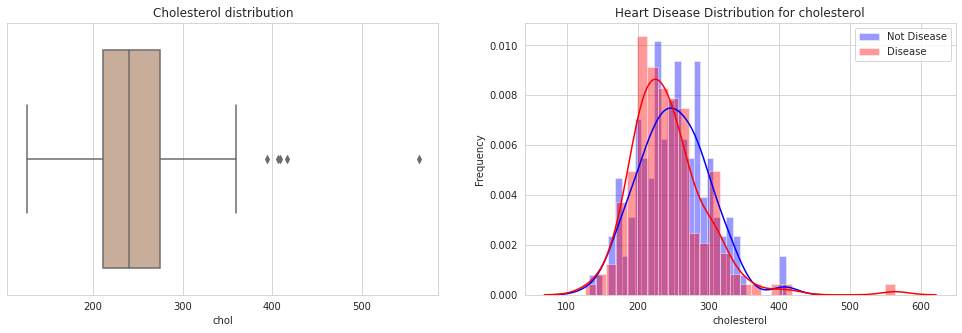

In [105]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df['chol'], palette = "pink", ax=ax[0])
ax[0].set_title("Cholesterol distribution")
sns.distplot(df.chol[df['target'] == 0], bins=30, color='blue', label='Not Disease',ax=ax[1])
sns.distplot(df.chol[df['target'] == 1], bins=30, color='red', label='Disease',ax=ax[1])
plt.legend()
plt.title('Heart Disease Distribution for cholesterol')
plt.xlabel('cholesterol')
plt.ylabel('Frequency')
plt.show()

* Peak exercise ST segment

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


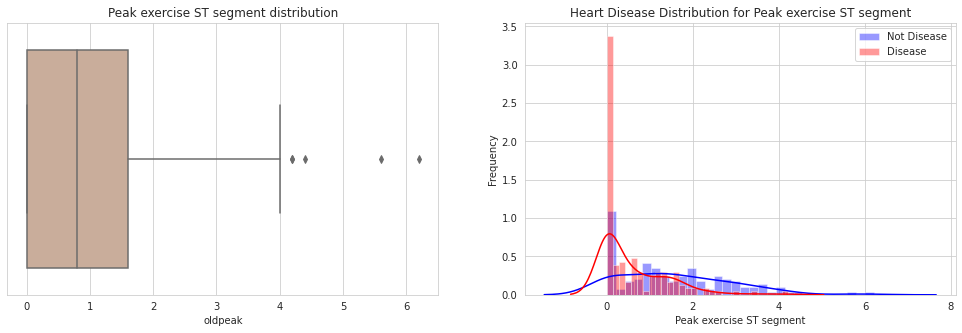

In [106]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df['oldpeak'], palette = "pink", ax=ax[0])
ax[0].set_title("Peak exercise ST segment distribution")
sns.distplot(df.oldpeak[df['target'] == 0], bins=30, color='blue', label='Not Disease')
sns.distplot(df.oldpeak[df['target'] == 1], bins=30, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for Peak exercise ST segment')
plt.xlabel('Peak exercise ST segment')
plt.ylabel('Frequency')
plt.show()

* Maximum heart rate achieved

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


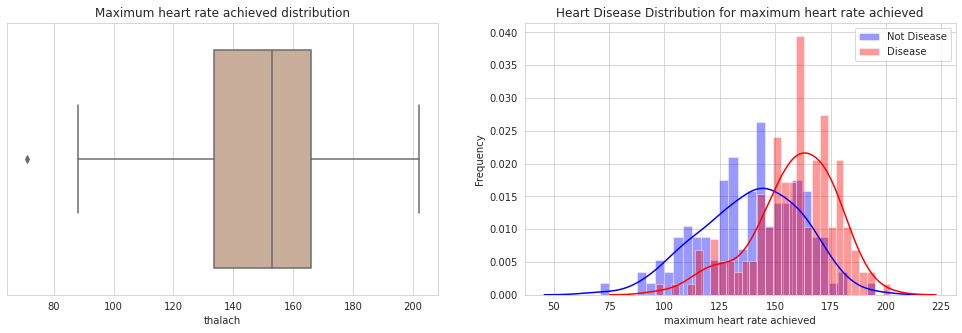

In [107]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.boxplot(x=df['thalach'], palette = "pink", ax=ax[0])
ax[0].set_title("Maximum heart rate achieved distribution")
sns.distplot(df.thalach[df['target'] == 0], bins=30, color='blue', label='Not Disease')
sns.distplot(df.thalach[df['target'] == 1], bins=30, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for maximum heart rate achieved')
plt.xlabel('maximum heart rate achieved')
plt.ylabel('Frequency')
plt.show()

* Categorical variables:


1.  sex: 0 female, 1 male;

2. chest pain type (cp): 0 typical angina, 1 atypical angina, 2 non-anginal pain, 3 asymptomatic;

3. fasting blood sugar (fbs): 1 if fbs > 120 mg/dl, 0 otherwise;

4. resting electrocardiographic results (restecg): 0 nothing to note, 1 ST-TWave abnormality, 2 possible or definite left ventricular hypertrophy;

5. exercise induced angina (exang): 1 if true, 0 otherwise;

6. slope of the peak exercise ST segment (slope): 0 upsloping (uncommon), 1  flatsloping (typical healthy heart), 2 downsloping (unhealthy heart);

7. number of major vessels colored by flourosopy (ca): goes from 0 to 3;

8. thalassemia (thal): 3 normal; 6 fixed defect; 7 reversable defect.



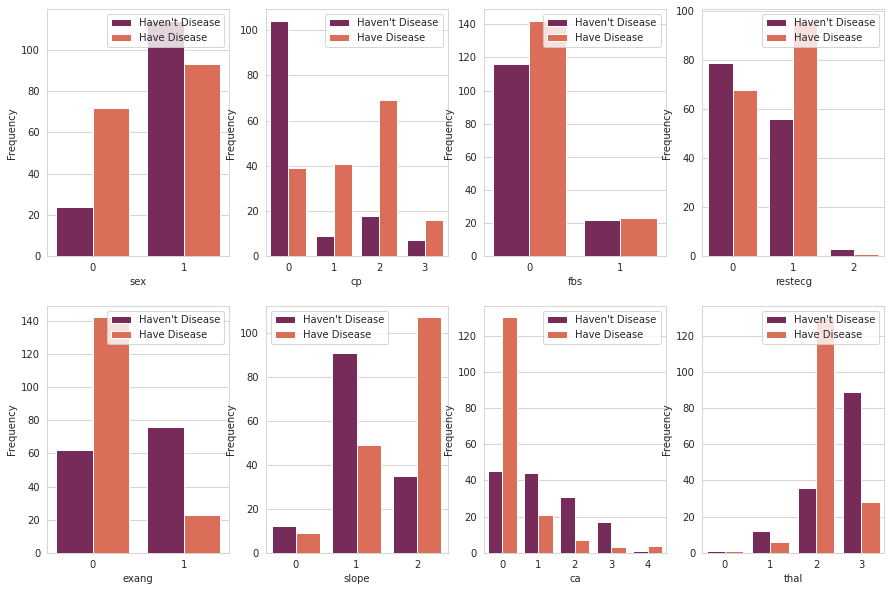

In [108]:
fig, axes = plt.subplots(2,4, figsize=(15,10))
for i, axi in enumerate(axes.flat):
    sns.countplot(x=class_names[i], hue='target', data=df, palette='rocket' , ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Haven't Disease", "Have Disease"])

### 3. Data processing and data preparation

In [109]:
dataset = pd.get_dummies(df, columns = class_names)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [110]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
dataset[real_names] = s_sc.fit_transform(dataset[real_names])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952,0.764,-0.256,0.015,1.087,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915,-0.093,0.072,1.633,2.123,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474,-0.093,-0.817,0.978,0.311,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180,-0.664,-0.198,1.240,-0.207,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290,-0.664,2.082,0.584,-0.379,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [240]:
all_resultsTT=[]
all_resultsCV=[]

### 4. Logistic Regression

#### 4.1. Logistic Regression with train-test split

In [241]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [242]:
from sklearn.model_selection import train_test_split  
X = dataset.drop('target', axis=1)
Y = dataset.target

Try different values for seed.

In [243]:
import matplotlib.pyplot as plt
import numpy as np

acc = []  
seeds = [1,7,10,15,35,42,100]

for seed in seeds: 
    #seeds.append(seed)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)
    model = LogisticRegression(solver='lbfgs', max_iter=500)            
    model.fit(X_train, Y_train)            
    result = model.score(X_test, Y_test) 
    output_result = result*100.0
    print("Seed %2d - Accuracy: %.3f%%" % (seed,output_result))   
    acc.append(output_result)
#print(seeds)

Seed  1 - Accuracy: 82.000%
Seed  7 - Accuracy: 83.000%
Seed 10 - Accuracy: 80.000%
Seed 15 - Accuracy: 79.000%
Seed 35 - Accuracy: 86.000%
Seed 42 - Accuracy: 86.000%
Seed 100 - Accuracy: 85.000%


In [244]:
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
  modelLR = LogisticRegression()
  modelLR.fit(X_train, Y_train)
  LR_acc = modelLR.score(X_test, Y_test)
  LR_acc = LR_acc*100.0
  all_resultsTT.append(LR_acc)
  predictedLR = modelLR.predict(X_test)
  reportLR = classification_report(Y_test, predictedLR)   
  print(reportLR)


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.87      0.90      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.86       100
weighted avg       0.86      0.86      0.86       100



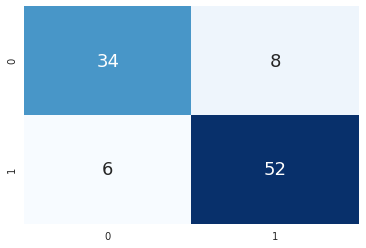

In [245]:
matrix1 = confusion_matrix(Y_test, predictedLR)
sns.heatmap(matrix1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})  
plt.show()

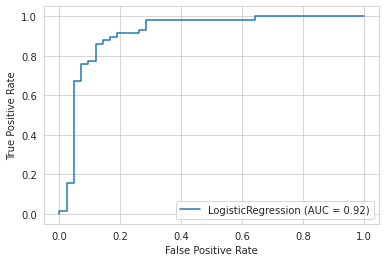

In [246]:
from sklearn import metrics
metrics.plot_roc_curve(modelLR, X_test, Y_test) 

#### 4.2. Logistic Regression with *k*-fold cross-validation

In [247]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [248]:
num_folds = [5,7,10,20,40,50,80,100,120]
seed = 42
for i in num_folds:
  kfold = KFold(n_splits=i, random_state=seed, shuffle=True)
  modelLRkF = LogisticRegression()
  resultsLRkF = cross_val_score(modelLRkF, X, Y, cv=kfold)
  #print("Seed %2d - Accuracy: %.3f%%" % (i,results.mean()*100.0, results.std()*100.0))
  print("Number of folds: "+ str(i)+" Accuracy: %.3f%% (%.3f%%)" % (resultsLRkF.mean()*100.0, resultsLRkF.std()*100.0))

Number of folds: 5 Accuracy: 86.126% (2.066%)
Number of folds: 7 Accuracy: 85.148% (7.944%)
Number of folds: 10 Accuracy: 86.151% (6.317%)
Number of folds: 20 Accuracy: 86.458% (9.041%)
Number of folds: 40 Accuracy: 86.027% (13.575%)
Number of folds: 50 Accuracy: 85.857% (13.623%)
Number of folds: 80 Accuracy: 85.729% (20.505%)
Number of folds: 100 Accuracy: 85.917% (20.265%)
Number of folds: 120 Accuracy: 85.417% (22.929%)


Also in this case I select the parameters giving the highest accuracy (number of folds set to 20).

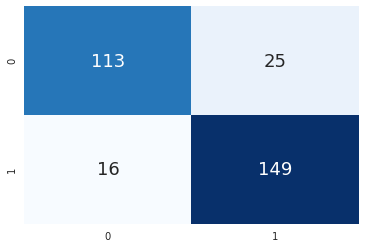

In [249]:
cvfoldLR=KFold(n_splits=20, random_state=42, shuffle=True)
cv_predLR = cross_val_predict(LogisticRegression(), X, Y, cv=cvfoldLR)
cv_accLR = accuracy_score(Y, cv_predLR)    
all_resultsCV.append(cv_accLR*100)
matrix2 = confusion_matrix(Y, cv_predLR)
sns.heatmap(matrix2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()

In [250]:
results_df = pd.DataFrame(data=[["Logistic Regression", LR_acc, cv_accLR*100]], 
                          columns=['Model', 'TT Accuracy %', 'CV Accuracy %'])
results_df

,Model,TT Accuracy %,CV Accuracy %
0,Logistic Regression,86.0,86.469


### 5. K-Neighbors

#### 5.1. K-Neighbors with train-test split

In [251]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)
knn_pred = knn_clf.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
all_resultsTT.append(knn_acc*100)
knn_report = classification_report(Y_test, knn_pred)   
print(knn_report)
print(all_resultsTT)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.89      0.86      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

[86.0, 86.0]


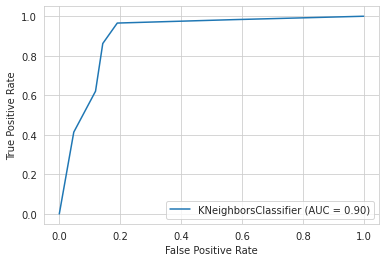

In [252]:
metrics.plot_roc_curve(knn_clf, X_test, Y_test)

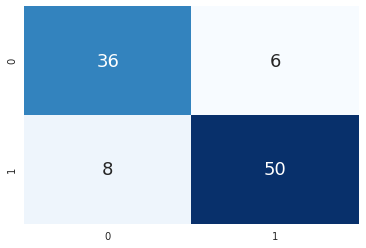

In [253]:
matrix4 = confusion_matrix(Y_test, knn_pred)
sns.heatmap(matrix4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})  
plt.show()

#### 5.2. K-Neighbors with *k*-fold cross-validation

In [254]:
num_folds = [5,7,10,20,40,50,80,100,120]
seed = 42
for i in num_folds:
  kfoldknn=KFold(n_splits=i, random_state=42, shuffle=True)
  modelknn_kF = KNeighborsClassifier()
  resultsknn_kF = cross_val_score(modelknn_kF, X, Y, cv=kfoldknn)
  print("Number of folds: "+ str(i)+" Accuracy: %.3f%% (%.3f%%)" % (resultsknn_kF.mean()*100.0, resultsknn_kF.std()*100.0))

Number of folds: 5 Accuracy: 81.481% (5.594%)
Number of folds: 7 Accuracy: 82.158% (6.100%)
Number of folds: 10 Accuracy: 81.806% (6.076%)
Number of folds: 20 Accuracy: 82.458% (8.542%)
Number of folds: 40 Accuracy: 81.652% (14.578%)
Number of folds: 50 Accuracy: 81.429% (14.793%)
Number of folds: 80 Accuracy: 81.875% (21.318%)
Number of folds: 100 Accuracy: 81.750% (22.752%)
Number of folds: 120 Accuracy: 81.528% (25.166%)


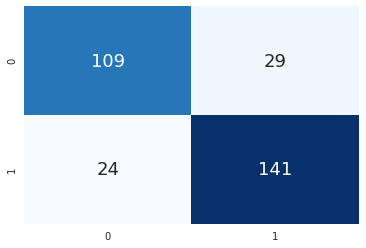

In [255]:
cvfoldknn=KFold(n_splits=20, random_state=42, shuffle=True)
cv_predknn = cross_val_predict(KNeighborsClassifier(), X, Y, cv=cvfoldknn)
cv_accknn = accuracy_score(Y, cv_predknn)    
all_resultsCV.append(cv_accknn*100)
matrix5 = confusion_matrix(Y, cv_predknn)
sns.heatmap(matrix5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()

In [256]:
results_df1 = pd.DataFrame(data=[["K-Neighbours", knn_acc*100, cv_accknn*100]], 
                          columns=['Model', 'TT Accuracy %', 'CV Accuracy %'])
results_df = results_df.append(results_df1, ignore_index=True)
results_df

,Model,TT Accuracy %,CV Accuracy %
0,Logistic Regression,86.0,86.469
1,K-Neighbours,86.0,82.508


### 6. SVM

#### 6.1. SVM with train-test split

In [257]:
from sklearn.svm import SVC
modelSVM = SVC(kernel = 'rbf')
modelSVM.fit(X_train, Y_train)
SVM_pred = modelSVM.predict(X_test)
SVM_report = classification_report(Y_test, SVM_pred)
SVM_acc = accuracy_score(Y_test, SVM_pred)
all_resultsTT.append(SVM_acc*100)   
print(SVM_report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.91      0.90      0.90        58

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



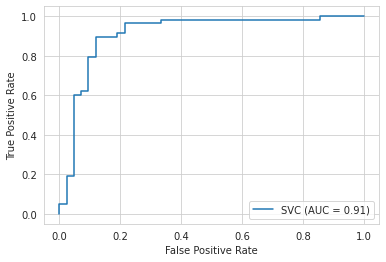

In [258]:
metrics.plot_roc_curve(modelSVM, X_test, Y_test)

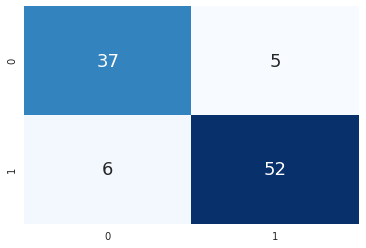

In [259]:
matrix6 = confusion_matrix(Y_test, SVM_pred)
sns.heatmap(matrix6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})  
plt.show()

#### 6.2. SVM with *k*-fold cross-validation

In [260]:
for i in num_folds:
  kfoldSVM=KFold(n_splits=i, random_state=42, shuffle=True)
  modelSVM_kF = SVC(kernel = 'rbf')
  resultsSVM_kF = cross_val_score(modelSVM_kF, X, Y, cv=kfoldSVM)
  print("Number of folds: "+ str(i)+" Accuracy: %.3f%% (%.3f%%)" % (resultsSVM_kF.mean()*100.0, resultsSVM_kF.std()*100.0))

Number of folds: 5 Accuracy: 84.781% (5.389%)
Number of folds: 7 Accuracy: 83.487% (7.625%)
Number of folds: 10 Accuracy: 84.140% (6.951%)
Number of folds: 20 Accuracy: 83.500% (8.509%)
Number of folds: 40 Accuracy: 84.286% (14.231%)
Number of folds: 50 Accuracy: 83.810% (14.723%)
Number of folds: 80 Accuracy: 85.000% (19.650%)
Number of folds: 100 Accuracy: 84.500% (20.683%)
Number of folds: 120 Accuracy: 83.750% (24.101%)


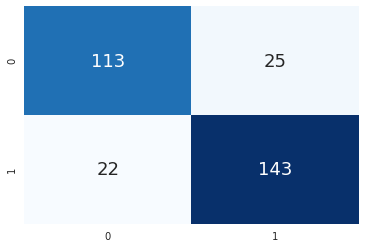

In [261]:
cvfoldSVM=KFold(n_splits=80, random_state=42, shuffle=True)
cv_predSVM = cross_val_predict(modelSVM_kF, X, Y, cv=kfoldSVM)  
cv_accSVM = accuracy_score(Y, cv_predSVM)
all_resultsCV.append(cv_accSVM*100) 
matrix7 = confusion_matrix(Y, cv_predSVM)
sns.heatmap(matrix7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()

In [262]:
results_df2 = pd.DataFrame(data=[["SVM", SVM_acc*100, cv_accSVM*100]], 
                          columns=['Model', 'TT Accuracy %', 'CV Accuracy %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,TT Accuracy %,CV Accuracy %
0,Logistic Regression,86.0,86.469
1,K-Neighbours,86.0,82.508
2,SVM,89.0,84.488


### 7. Naive Bayes

#### 7.1. Naive Bayes with train-test split

In [263]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, Y_train)
GNB_pred = modelGNB.predict(X_test)
GNB_report = classification_report(Y_test, GNB_pred) 
GNB_acc = accuracy_score(Y_test, GNB_pred)  
all_resultsTT.append(GNB_acc*100)
print(GNB_report)

              precision    recall  f1-score   support

           0       0.76      0.83      0.80        42
           1       0.87      0.81      0.84        58

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



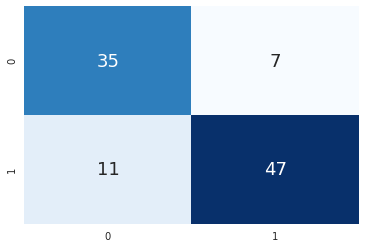

In [264]:
matrix8 = confusion_matrix(Y_test, GNB_pred)
sns.heatmap(matrix8,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})  
plt.show()

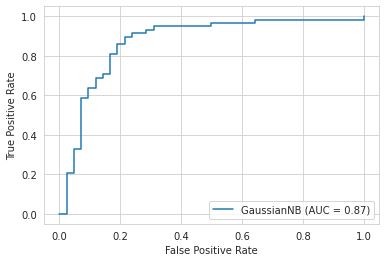

In [265]:
metrics.plot_roc_curve(modelGNB, X_test, Y_test)

#### 7.2. Naive Bayes with *k*-fold cross-validation

In [266]:
for i in num_folds:
  kfoldGNB=KFold(n_splits=i, random_state=42, shuffle=True)
  modelGNB_kF = GaussianNB()
  resultsGNB_kF = cross_val_score(modelGNB_kF, X, Y, cv=kfoldGNB)
  print("Number of folds: "+ str(i)+" Accuracy: %.3f%% (%.3f%%)" % (resultsGNB_kF.mean()*100.0, resultsGNB_kF.std()*100.0))

Number of folds: 5 Accuracy: 73.945% (12.976%)
Number of folds: 7 Accuracy: 77.280% (11.073%)
Number of folds: 10 Accuracy: 78.968% (11.363%)
Number of folds: 20 Accuracy: 80.063% (15.177%)
Number of folds: 40 Accuracy: 82.455% (17.450%)
Number of folds: 50 Accuracy: 83.524% (14.622%)
Number of folds: 80 Accuracy: 83.021% (20.346%)
Number of folds: 100 Accuracy: 83.000% (21.503%)
Number of folds: 120 Accuracy: 81.806% (25.909%)


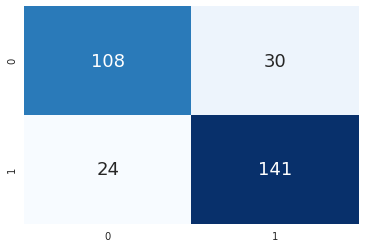

In [267]:
cvfoldGNB=KFold(n_splits=50, random_state=42, shuffle=True)
cv_predGNB = cross_val_predict(modelGNB_kF, X, Y, cv=kfoldGNB)   
matrix9 = confusion_matrix(Y, cv_predGNB)
cv_accGNB = accuracy_score(Y, cv_predGNB)
all_resultsCV.append(cv_accGNB*100)
sns.heatmap(matrix9,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()

In [268]:
results_df3 = pd.DataFrame(data=[["Naive Bayes", GNB_acc*100, cv_accGNB*100]], 
                          columns=['Model', 'TT Accuracy %', 'CV Accuracy %'])
results_df = results_df.append(results_df3, ignore_index=True)
results_df

,Model,TT Accuracy %,CV Accuracy %
0,Logistic Regression,86.0,86.469
1,K-Neighbours,86.0,82.508
2,SVM,89.0,84.488
3,Naive Bayes,82.0,82.178


### 8. Decision Tree

#### 8.1. Decision Tree with train-test split

In [269]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, Y_train)
DT_pred = modelDT.predict(X_test)
DT_report = classification_report(Y_test, DT_pred) 
DT_acc = accuracy_score(Y_test,DT_pred)
all_resultsTT.append(DT_acc*100)  
print(DT_report)

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        42
           1       0.84      0.71      0.77        58

    accuracy                           0.75       100
   macro avg       0.75      0.76      0.75       100
weighted avg       0.77      0.75      0.75       100



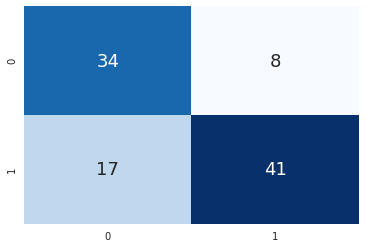

In [270]:
matrix10 = confusion_matrix(Y_test, DT_pred)
sns.heatmap(matrix10,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})  
plt.show()

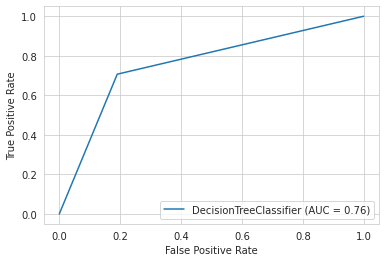

In [271]:
metrics.plot_roc_curve(modelDT, X_test, Y_test)

#### 8.2. Decision Tree with *k*-fold cross-validation

In [272]:
for i in num_folds:
  kfoldDT=KFold(n_splits=i, random_state=42, shuffle=True)
  modelDT_kF = DecisionTreeClassifier()
  resultsDT_kF = cross_val_score(modelDT_kF, X, Y, cv=kfoldDT)
  print("Number of folds: "+ str(i)+" Accuracy: %.3f%% (%.3f%%)" % (resultsDT_kF.mean()*100.0, resultsDT_kF.std()*100.0))

Number of folds: 5 Accuracy: 77.213% (3.748%)
Number of folds: 7 Accuracy: 72.244% (5.683%)
Number of folds: 10 Accuracy: 73.269% (7.002%)
Number of folds: 20 Accuracy: 73.250% (9.713%)
Number of folds: 40 Accuracy: 74.062% (13.189%)
Number of folds: 50 Accuracy: 74.762% (19.760%)
Number of folds: 80 Accuracy: 74.375% (22.196%)
Number of folds: 100 Accuracy: 77.167% (24.113%)
Number of folds: 120 Accuracy: 77.500% (27.101%)


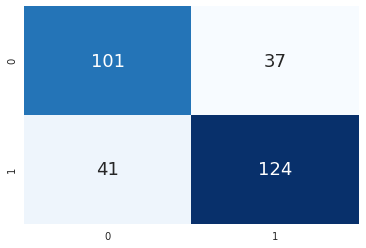

In [273]:
cvfoldDT=KFold(n_splits=5, random_state=42, shuffle=True)
cv_predDT = cross_val_predict(modelDT_kF, X, Y, cv=kfoldDT)   
matrix11 = confusion_matrix(Y, cv_predDT)
cv_accDT = accuracy_score(Y, cv_predDT)
all_resultsCV.append(cv_accDT*100)
sns.heatmap(matrix11,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.show()

In [274]:
results_df4 = pd.DataFrame(data=[["Decision Tree", DT_acc*100, cv_accDT*100]], 
                          columns=['Model', 'TT Accuracy %', 'CV Accuracy %'])
results_df = results_df.append(results_df4, ignore_index=True)

### 9. Models comparison

The table below shows the final accuracies for each Machine Learning algorithm in both train-test split and *k*-fold cross-validation.

In [275]:
results_df

,Model,TT Accuracy %,CV Accuracy %
0,Logistic Regression,86.0,86.469
1,K-Neighbours,86.0,82.508
2,SVM,89.0,84.488
3,Naive Bayes,82.0,82.178
4,Decision Tree,75.0,74.257


In [277]:
def mean_acc(model_index,tt_acc,cv_acc):
  mean_model=(tt_acc[model_index]+cv_acc[model_index])/2
  return mean_model

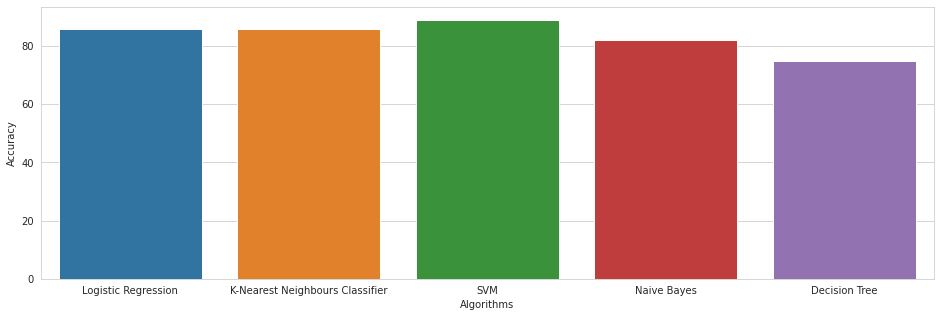

In [145]:
from matplotlib import pyplot
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks()
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=ML_algos, y=all_resultsTT)

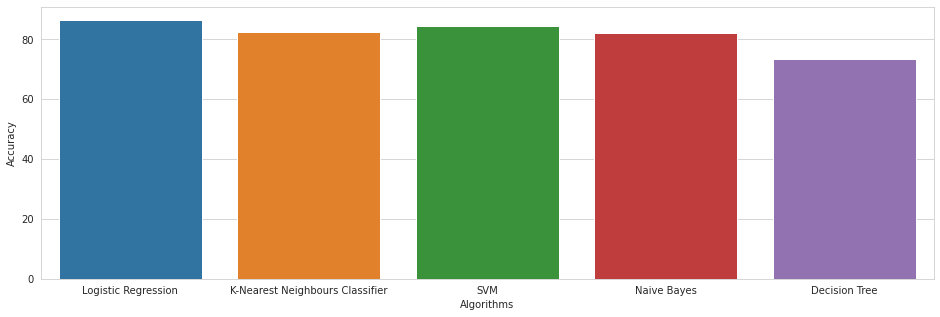

In [146]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks()
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=ML_algos, y=all_resultsCV)

The means among the accuracies resulting in train-test split and *k*-fold cross-validation procedures are calculated for each ML algorithm:

In [281]:
for i in range(len(ML_algos)):
  print(ML_algos[i]+" "+str(mean_acc(i,all_resultsTT,all_resultsCV)))

Logistic Regression 86.23432343234325
K-Nearest Neighbours Classifier 84.25412541254126
SVM 86.74422442244224
Naive Bayes 82.08910891089108
Decision Tree 74.62871287128712


As a result, no great differences are detactable between train-test split and *k*-fold cross validation training procedures, except for SVM and *K*-Neighbours algorithms. On the other hand, the model giving the highest accuracy is SVM.

### 10. Ensamble methods

#### 10.1. Bagging Classifier

Bagging classifier with Decision Tree as base estimator.

In [168]:
from sklearn.ensemble import BaggingClassifier  
#seed = 7
#kfold = KFold(n_splits=10, random_state=seed)
#cart = DecisionTreeClassifier(random_state=seed)
num_trees = 100
modelBC = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=num_trees, random_state=42, bootstrap = True)
resultsBC = cross_val_score(modelBC, X, Y, cv=kfoldDT)
print(resultsBC.mean()*100)

80.0


Bagging classifier with Logistic Regression as base estimator.

In [ ]:
num_trees = 100
modelBCLR = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=num_trees, random_state=42, bootstrap = True)
resultsBCLR = cross_val_score(modelBCLR, X, Y, cv=cvfoldLR)
print(resultsBCLR.mean()*100)

86.125


#### 10.2. Random Forest Classifier



In [236]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
modelRFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
resultsRFC = cross_val_score(model, X, Y, cv=kfoldDT)
print(resultsRFC.mean()*100)

85.41666666666666


#### 10.3. ExtraTrees Classifier

In [237]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
#kfold = KFold(n_splits=10, random_state=7)
modelETC = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
resultsETC = cross_val_score(modelETC, X, Y, cv=kfoldDT)
print(resultsETC.mean()*100)

82.08333333333333


#### 10.4. Voting Classifier

In [238]:
from sklearn.ensemble import VotingClassifier
estimators = []
model1 = LogisticRegression()
estimators.append(( 'logistic' , model1))
model2 = DecisionTreeClassifier()
estimators.append(( 'DT' , model2))
model3 = SVC()
estimators.append(( 'svm' , model3))
model4 = GaussianNB()
estimators.append(('NB', model4))
model5 = KNeighborsClassifier()
estimators.append(('KNN', model5))

#with train-test split
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, Y_train)
predEN = ensemble.predict(X_test)
accEN = accuracy_score(Y_test, predEN)
print(accEN)

#with k-fold cross-validation
kfold = KFold(n_splits=50, random_state=42, shuffle=True)
ensembleCV = VotingClassifier(estimators)
resultsCV = cross_val_score(ensembleCV, X, Y, cv=kfold)
print(resultsCV.mean())

0.85
0.848095238095238
